In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

In [ ]:
# 1. Load the dataset
df = pd.read_csv('/content/tsla_2014_2023.csv')  # Ensure the dataset has 'Date' and 'Close' columns
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [ ]:
# 2. Preprocess the data (normalize)
data = df[['close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# 3. Create sequences for the RNN
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

In [ ]:
# 4. Split the data into train and test sets
split_index = int(len(X) * 0.8)
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

In [ ]:
# 5. Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))  # Output layer for predicting the stock price

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 6. Train the model on the training set
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0083 - val_loss: 0.0011
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6200e-04 - val_loss: 8.2234e-04
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.6301e-04 - val_loss: 7.7677e-04
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.2476e-04 - val_loss: 7.8228e-04
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5119e-04 - val_loss: 7.2203e-04
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5705e-04 - val_loss: 8.1561e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.5603e-04 - val_loss: 6.5748e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.2613e-04 - val_loss: 6.6815e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8091e-04 - val_loss: 0.0010
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4991e-04 - val_loss: 9.7463e-04


In [ ]:
# 7. Predict for the next 20 days
# Use the last 60 days from the training set to predict the next 20 days
predictions = []
input_sequence = scaled_data[split_index - sequence_length:split_index]

for _ in range(20):  # Predict for the next 20 days
    input_sequence = np.reshape(input_sequence, (1, sequence_length, 1))  # Ensure correct shape for RNN
    predicted_price = model.predict(input_sequence)

    predictions.append(predicted_price[0][0])  # Save predicted price

    # Reshape the predicted price to match input shape (1, 1, 1)
    predicted_price = np.reshape(predicted_price, (1, 1, 1))

    # Shift the input_sequence and append the predicted price
    input_sequence = np.append(input_sequence[:, 1:, :], predicted_price, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [ ]:
# 8. Inverse transform the predicted prices
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

In [ ]:
# 9. Compare with the actual prices
actual_prices = scaler.inverse_transform(scaled_data[split_index:split_index+20])

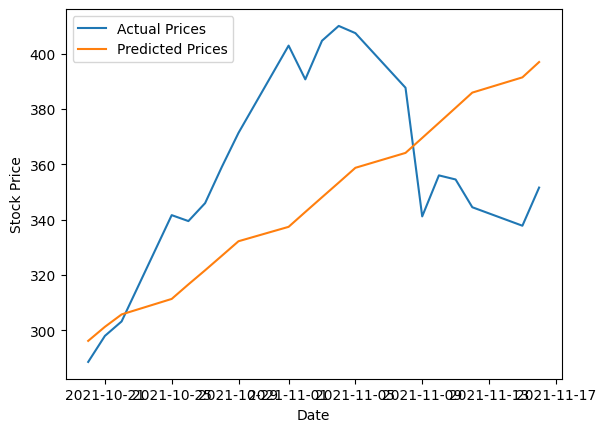

In [ ]:
# 10. Plot the results
plt.plot(df.index[split_index:split_index+20], actual_prices, label='Actual Prices')
plt.plot(df.index[split_index:split_index+20], predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Print actual and predicted prices for the next 20 days
for i in range(20):
    print(f"Day {i+1}: Actual: {actual_prices[i][0]}, Predicted: {predicted_prices[i][0]}")

Day 1: Actual: 288.600006, Predicted: 296.2021789550781
Day 2: Actual: 298.0, Predicted: 301.2749938964844
Day 3: Actual: 303.226654, Predicted: 305.753662109375
Day 4: Actual: 341.619995, Predicted: 311.35638427734375
Day 5: Actual: 339.476654, Predicted: 316.6012878417969
Day 6: Actual: 345.953339, Predicted: 321.7001953125
Day 7: Actual: 359.013336, Predicted: 326.9311828613281
Day 8: Actual: 371.333344, Predicted: 332.19281005859375
Day 9: Actual: 402.863342, Predicted: 337.3946838378906
Day 10: Actual: 390.666656, Predicted: 342.7604064941406
Day 11: Actual: 404.61999499999996, Predicted: 348.0771789550781
Day 12: Actual: 409.970001, Predicted: 353.3675842285156
Day 13: Actual: 407.363342, Predicted: 358.7219543457031
Day 14: Actual: 387.646667, Predicted: 364.1014099121094
Day 15: Actual: 341.166656, Predicted: 369.50927734375
Day 16: Actual: 355.983337, Predicted: 374.9464416503906
Day 17: Actual: 354.503326, Predicted: 380.40301513671875
Day 18: Actual: 344.473328, Predicted: 3